<a href="https://colab.research.google.com/github/prd-dahal/AI_Projects/blob/master/Currency_Detection_using_Transfer_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')
import os
print(os.listdir('/content/gdrive/My Drive/MONEY DETECTION DATA/valid'))

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
['100', '10', '50', '500', '1000', '20', 'None', '5']


In [2]:
#dependencies  
import keras 
from keras import Model, Sequential, layers, models
from keras.preprocessing.image import ImageDataGenerator
from PIL import ImageFile
from keras import regularizers

Using TensorFlow backend.


In [0]:
#variable declerations 
image_width = 256
image_height = 256
batch_size = 16
no_of_training_sample = 250
no_of_validation_sample = 50
epochs = 90
train_path = '/content/gdrive/My Drive/MONEY DETECTION DATA/train'
valid_path = '/content/gdrive/My Drive/MONEY DETECTION DATA/valid'


In [4]:
#preparing model 
model = keras.applications.VGG19(include_top=False, weights='imagenet',input_shape=(image_height,image_width,3))
#freezing all the layers except  last layer 
for layer in model.layers[:-2]:
  layer.trainable = False

#adding custom layers
x = model.output
x = layers.Flatten()(x)
x = layers.Dense(1024, activation='relu', kernel_regularizer=regularizers.l2(0.01))(x)
x = layers.Dense(512, activation='relu',kernel_regularizer=regularizers.l2(0.01))(x)
predictions = layers.Dense(8, activation='softmax')(x)
model_final = Model(inputs=model.input, outputs=predictions)
model_final.compile(loss = 'categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
model_final.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 256, 256, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 256, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 256, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 128, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 128, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 128, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 64, 64, 128)       0   

In [5]:

ImageFile.LOAD_TRUNCATED_IMAGES = True
#data augumentation in train set
train_data_generator = ImageDataGenerator(
    horizontal_flip=True,
    rescale = 1./255,
    fill_mode ='nearest',
    zoom_range = 0.3,
    width_shift_range=0.3,
    height_shift_range=0.3,
    rotation_range=30

)
#data augumentation in valid test
valid_data_generator = ImageDataGenerator(
    horizontal_flip =True,
    rescale = 1./255,
    fill_mode='nearest',
    zoom_range = 0.3,
    width_shift_range = 0.3,
    rotation_range = 30,
    height_shift_range = 0.3
)

#specifying train data directory and resize
train_generator = train_data_generator.flow_from_directory(
    train_path,
    target_size = (image_height, image_width),
    class_mode = 'categorical'
)

#specifying test data directory and resize 
valid_generator = valid_data_generator.flow_from_directory(
    valid_path,
    target_size = (image_height, image_width),
    class_mode = 'categorical'
)


Found 2000 images belonging to 8 classes.
Found 560 images belonging to 8 classes.


In [6]:
#fit the model 
model_final.fit_generator(train_generator,
                          samples_per_epoch=no_of_training_sample, 
                          epochs= epochs, 
                          validation_data=valid_generator,
                          
)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras.pre..., epochs=90, validation_data=<keras.pre..., steps_per_epoch=7)`
  after removing the cwd from sys.path.


Epoch 1/90
7/7 [==============================] - 371s 53s/step - loss: 26.9228 - accuracy: 0.1384 - val_loss: 16.7152 - val_accuracy: 0.1554
Epoch 2/90
7/7 [==============================] - 338s 48s/step - loss: 14.1675 - accuracy: 0.2277 - val_loss: 11.7687 - val_accuracy: 0.2929
Epoch 3/90
7/7 [==============================] - 335s 48s/step - loss: 11.1833 - accuracy: 0.2500 - val_loss: 9.9978 - val_accuracy: 0.3018
Epoch 4/90
7/7 [==============================] - 335s 48s/step - loss: 9.1652 - accuracy: 0.3750 - val_loss: 8.0920 - val_accuracy: 0.3768
Epoch 5/90
7/7 [==============================] - 335s 48s/step - loss: 7.4561 - accuracy: 0.3929 - val_loss: 6.6205 - val_accuracy: 0.3393
Epoch 6/90
7/7 [==============================] - 330s 47s/step - loss: 6.2558 - accuracy: 0.4567 - val_loss: 6.0223 - val_accuracy: 0.4839
Epoch 7/90
7/7 [==============================] - 335s 48s/step - loss: 5.4428 - accuracy: 0.4643 - val_loss: 5.5686 - val_accuracy: 0.3929
Epoch 8/90
7/7 

In [0]:
model.save('money_detection.h5')

(2560, 1440, 3)


(1, 8, 8, 512)

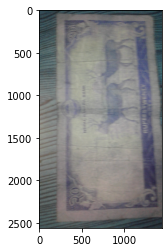

In [38]:
import os
import matplotlib.pyplot as plt
import cv2
path = '/content/gdrive/My Drive/MONEY DETECTION DATA/valid/20'
os.listdir(path)
image_path = '/content/gdrive/My Drive/MONEY DETECTION DATA/valid/20/20190618_194930.jpg'
image = cv2.imread(image_path)
print(image.shape)
plt.imshow(image)

dim = (256,256)
pred_image = cv2.resize(image,dim,interpolation = cv2.INTER_AREA)
pred_image = pred_image.reshape(1,256,256,3)

predicted = model.predict(pred_image)
predicted.shape
